In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

from matplotlib.colors import LinearSegmentedColormap
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib.colors import BoundaryNorm

#local import
import paper.res_function as res

import warnings
warnings.filterwarnings('ignore')

In [3]:
xr_cdp = xr.open_dataset('wfj_season_2013.nc')
df_cdp = xr_cdp.to_dataframe().dropna()

#get list of date
dates_cdp = df_cdp.groupby(level = 'time').mean().index.get_level_values(0)

In [4]:
MEPRA_dict = {'PP': 0,      # fr
              'PP+DF': 1,   # fr_lb
              'DF': 2,      # lb
              'DF+RG': 3,   # lb_fin
              'DF+FC': 4,   # lb_ang
              'PPgp': 5,    # roul
              'RG': 6,      # fin
              'MF+RG': 7,   # fin_ar
              'RG+FC': 8,   # fin_ang
              'FC': 9,      # pl
              'FC+DH': 10,  # pl_gob
              'DH': 11,     # gob
              'MF': 12,     # gel
              'MF+DH': 13,  # gob_fon
              'MF+FC': 14   # ron_ang
              }

MEPRA_labels = ['PP', 'PP+DF', 'DF', 'DF+RG', 'DF+FC', 'PPgp', 'RG', 'MF+RG', 'RG+FC', 'FC', 'FC+DH', 'DH', 'MF', 'MF+DH', 'MF+FC']

coloring = {'PP': np.array([0, 255, 0]) / 255.0,
            'MM': np.array([255, 215, 0]) / 255.0,
            'DF': np.array([34, 139, 34]) / 255.0,
            'RG': np.array([255, 182, 193]) / 255.0,
            'FC': np.array([173, 216, 230]) / 255.0,
            'DH': np.array([0, 0, 255]) / 255.0,
            'SH': np.array([250, 0, 255]) / 255.0,
            'MF': np.array([255, 0, 0]) / 255.0,
            'MFcr': np.array([255, 255, 255]) / 255.0,
            'IF': np.array([0, 255, 255]) / 255.0,
            'NO': np.array([200, 200, 200]) / 255.0}

color_grain = {MEPRA_dict['PP']: coloring['PP'],
               MEPRA_dict['PP+DF']: 0.5 * (coloring['PP'] + coloring['DF']),
               MEPRA_dict['DF']: coloring['DF'],
               MEPRA_dict['DF+RG']: 0.5 * (coloring['DF'] + coloring['RG']),
               MEPRA_dict['DF+FC']: 0.5 * (coloring['DF'] + coloring['FC']),
               MEPRA_dict['PPgp']: [0, 0, 0],
               MEPRA_dict['RG']: coloring['RG'],
               MEPRA_dict['MF+RG']: 0.5 * (coloring['MF'] + coloring['RG']),
               MEPRA_dict['RG+FC']: 0.5 * (coloring['RG'] + coloring['FC']),
               MEPRA_dict['FC']: coloring['FC'],
               MEPRA_dict['FC+DH']: 0.5 * (coloring['FC'] + coloring['DH']),
               MEPRA_dict['DH']: coloring['DH'],
               MEPRA_dict['MF']: coloring['MF'],
               MEPRA_dict['MF+DH']: 0.5 * (coloring['MF'] + coloring['DH']),
               MEPRA_dict['MF+FC']: 0.5 * (coloring['MF'] + coloring['FC'])}

grain_colormap = LinearSegmentedColormap.from_list("custom", [[i / 14., color_grain[i]] for i in range(15)])

In [5]:
grain_colormap.N

256

In [6]:
# define the bins and normalize
bounds = np.linspace(0, len(MEPRA_dict), len(MEPRA_dict)+1)
norm = BoundaryNorm(bounds, grain_colormap.N)

In [7]:
def layer_k_noAverage(snow_df, n_clusters):
    
    X = pd.DataFrame({ 'ke' : res.compute_ke(snow_df), 'height' : snow_df.height})
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(X)
    snow_df['Group'] = kmeans.labels_
    snow_df['ke'] = res.compute_ke(snow_df)

    return snow_df

In [8]:
print(dates_cdp[150], dates_cdp[394])

2013-12-08 12:00:00 2014-02-07 12:00:00


In [9]:
#index choose a bit randomly to pick date early and mid season
snow_2_e = layer_k_noAverage(df_cdp.loc[dates_cdp[150],:], 2)
snow_2_m = layer_k_noAverage(df_cdp.loc[dates_cdp[394],:], 2)

snow_3_e = layer_k_noAverage(df_cdp.loc[dates_cdp[150],:], 3)
snow_3_m = layer_k_noAverage(df_cdp.loc[dates_cdp[394],:], 3)

In [10]:
snow_3_e['h_btm'] = snow_3_e.height - snow_3_e.thickness
stack_h = np.dstack([snow_3_e.height, snow_3_e.h_btm]).flatten()
stack_d = np.dstack([snow_3_e.SNODEN_ML, snow_3_e.SNODEN_ML]).flatten()
stack_d

array([105.2291, 105.2291, 114.5914, 114.5914, 121.357 , 121.357 ,
       124.3859, 124.3859, 120.8019, 120.8019, 113.0395, 113.0395,
       131.8575, 131.8575, 140.3021, 140.3021, 151.4917, 151.4917,
       163.6634, 163.6634, 172.1842, 172.1842, 175.8529, 175.8529,
       231.9508, 231.9508, 247.0474, 247.0474, 259.2485, 259.2485,
       218.0278, 218.0278, 278.2139, 278.2139, 299.4509, 299.4509,
       305.8249, 305.8249, 316.2672, 316.2672, 322.0207, 322.0207,
       326.6646, 326.6646, 286.0616, 286.0616, 405.2463, 405.2463,
       337.4745, 337.4745, 325.4222, 325.4222, 331.5603, 331.5603])

In [11]:
snow_3_e

,SNODEN_ML,SNOMA_ML,TSNOW_ML,SNODOPT_ML,SNOTYPE_ML,SNODP,WSNO,TSNO_SURF,SNOWRATE,RAINRATE,thickness,ssa,height,Group,ke,h_btm
snow_layer,,,,,,,,,,,,,,,,
0,105.2291,0.755571,260.8711,0.000216,2.0,0.742614,0.0,260.8711,0.0,0.0,0.007180,30.353298,0.742613,1,0.027148,0.735433
1,114.5914,1.099312,264.1261,0.000252,2.0,0.742614,0.0,260.8711,0.0,0.0,0.009593,25.971500,0.735433,1,0.035946,0.725840
2,121.3570,1.123953,265.3890,0.000260,2.0,0.742614,0.0,260.8711,0.0,0.0,0.009262,25.197064,0.725840,1,0.039671,0.716578
3,124.3859,1.249546,265.6418,0.000251,2.0,0.742614,0.0,260.8711,0.0,0.0,0.010046,26.115067,0.716578,1,0.038926,0.706533
4,120.8019,1.216717,265.4406,0.000240,2.0,0.742614,0.0,260.8711,0.0,0.0,0.010072,27.256022,0.706533,1,0.036157,0.696461
5,113.0395,1.068040,265.0774,0.000223,2.0,0.742614,0.0,260.8711,0.0,0.0,0.009448,29.335698,0.696461,1,0.031576,0.687012
6,131.8575,2.397800,264.5921,0.000545,10.0,0.742614,0.0,260.8711,0.0,0.0,0.018185,12.006643,0.687012,1,0.174535,0.668827
7,140.3021,2.676046,264.2825,0.000591,10.0,0.742614,0.0,260.8711,0.0,0.0,0.019073,11.080022,0.668827,1,0.219723,0.649754
8,151.4917,6.170388,264.3540,0.000664,14.0,0.742614,0.0,260.8711,0.0,0.0,0.040731,9.848925,0.649754,1,0.306714,0.609023


In [12]:
def change_group_e(row):
    if row['Group'] == 1:
        row['Group'] = 0
    elif row['Group'] == 0:
        row['Group'] = 1
    elif row['Group'] == 2:
        row['Group'] = 2
    return row

def change_group_m(row):
    if row['Group'] == 2:
        row['Group'] = int(0)
    elif row['Group'] == 0:
        row['Group'] = int(1)
    elif row['Group'] == 1:
        row['Group'] = int(2)
    return row

In [13]:
snow_3_e = snow_3_e.apply(lambda x: change_group_e(x), axis =1)
snow_3_m = snow_3_m.apply(lambda x: change_group_m(x), axis =1)

In [ ]:
snow_3_m.Group.astype(int)

snow_layer
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    2
32    2
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    2
44    2
45    2
Name: Group, dtype: int64

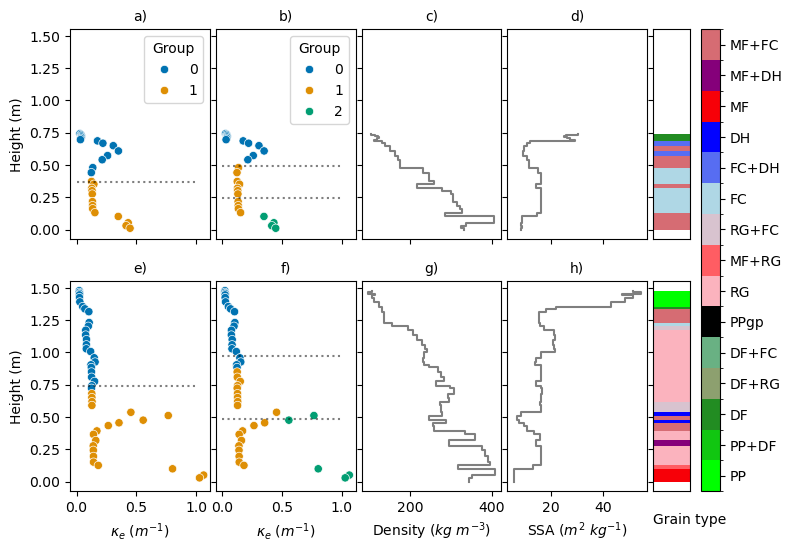

In [25]:
fig, ax = plt.subplots(2,5, figsize = (8,6), sharey = True, sharex = 'col', gridspec_kw={'width_ratios': [0.75, 0.75, 0.75, 0.75, 0.2]})

#snow1
#ax[0,2].set_title('WFJ : 2013-12-08')
sns.scatterplot(x = snow_2_e.ke, y= snow_2_e.height, hue = snow_2_e.Group, ax = ax[0,0], legend = True, palette= 'colorblind')
ax[0,0].set_ylabel('Height (m)')
ax[0,0].hlines(y = snow_2_e.SNODP[0]* 0.5, xmin=0, xmax=1, linestyles = ':', color = 'k', alpha = 0.5)
ax[0,0].set_xlabel('$\kappa_e$ ($m^{-1}$)')


sns.scatterplot(x = snow_3_e.ke, y= snow_3_e.height, hue = snow_3_e.Group.astype(int), ax = ax[0,1], legend = True, palette= 'colorblind')
ax[0,1].set_ylabel('Height (m)')
ax[0,1].hlines(y = snow_3_e.SNODP[0]* 0.33, xmin=0, xmax=1, linestyles = ':', color = 'k', alpha = 0.5)
ax[0,1].hlines(y = snow_3_e.SNODP[0]* 0.66, xmin=0, xmax=1, linestyles = ':', color = 'k', alpha = 0.5)

#ax[0,2].plot(snow_3_e.SNODEN_ML, snow_3_e.height, 'k', alpha = 0.5)
snow_3_e['h_btm'] = snow_3_e.height - snow_3_e.thickness
stack_h = np.dstack([snow_3_e.height, snow_3_e.h_btm]).flatten()
stack_d = np.dstack([snow_3_e.SNODEN_ML, snow_3_e.SNODEN_ML]).flatten()
stack_ssa = np.dstack([snow_3_e.ssa, snow_3_e.ssa]).flatten()

ax[0,2].plot(stack_d, stack_h, 'k', alpha = 0.5)
ax[0,3].plot(stack_ssa, stack_h, 'k', alpha = 0.5)
#ax[2].scatter(snow1.ssa, snow1.height, color = color_type)

#grain type
hgt_bot = snow_3_e.h_btm
hgt_top = snow_3_e.height
layers_obs = [Rectangle((0, h_bot), 1, h_top-h_bot,edgecolor=None) for h_bot,h_top in zip(list(hgt_bot),list(hgt_top))] 
# Create patch collection with specified colour/alpha
pc = PatchCollection(layers_obs, array = snow_3_e.SNOTYPE_ML, cmap=grain_colormap, norm = norm, 
                        edgecolor=None)
#ax[0,3].set_xticks([])
# Add collection to axes        
ax[0,4].add_collection(pc)  

ax[0,0].set_title('a)', size =10)
ax[0,1].set_title('b)', size =10)
ax[0,2].set_title('c)', size =10)
ax[0,3].set_title('d)', size =10)
#ax[0,4].set_title('e)', size =10)



#sno2
#ax[1,2].set_title('WFJ : 2014-02-09')
sns.scatterplot(x = snow_2_m.ke, y= snow_2_m.height, hue = snow_2_m.Group, ax = ax[1,0], palette= 'colorblind')
ax[1,0].set_ylabel('Height (m)')
ax[1,0].hlines(y = snow_2_m.SNODP[0]* 0.5, xmin=0, xmax=1, linestyles = ':', color = 'k', alpha = 0.5)
ax[1,0].set_xlabel('$\kappa_e$ ($m^{-1}$)')
ax[1,0].legend([]).remove()

sns.scatterplot(x = snow_3_m.ke, y= snow_3_m.height, hue = snow_3_m.Group.astype(int), ax = ax[1,1], palette= 'colorblind')
ax[1,1].set_ylabel('Height (m)')
ax[1,1].set_xlabel('$\kappa_e$ ($m^{-1}$)')
ax[1,1].hlines(y = snow_3_m.SNODP[0]* 0.33, xmin=0, xmax=1, linestyles = ':', color = 'k', alpha = 0.5)
ax[1,1].hlines(y = snow_3_m.SNODP[0]* 0.66, xmin=0, xmax=1, linestyles = ':', color = 'k', alpha = 0.5)
ax[1,1].legend([]).remove()



snow_3_m['h_btm'] = snow_3_m.height - snow_3_m.thickness
stack_h = np.dstack([snow_3_m.height, snow_3_m.h_btm]).flatten()
stack_d = np.dstack([snow_3_m.SNODEN_ML, snow_3_m.SNODEN_ML]).flatten()
stack_ssa = np.dstack([snow_3_m.ssa, snow_3_m.ssa]).flatten()

ax[1,2].plot(stack_d, stack_h, 'k', alpha = 0.5)
ax[1,2].set_xlabel('Density ($kg$ $m^{-3}$)')

ax[1,3].plot(stack_ssa, stack_h, 'k', alpha = 0.5)
ax[1,3].set_xlabel('SSA ($m^2$ $kg^{-1}$)')

ax[1,0].set_title('e)', size =10)
ax[1,1].set_title('f)', size =10)
ax[1,2].set_title('g)', size =10)
ax[1,3].set_title('h)', size =10)

#grain type
hgt_bot = snow_3_m.h_btm
hgt_top = snow_3_m.height
layers_obs = [Rectangle((0, h_bot), 1, h_top-h_bot,edgecolor=None) for h_bot,h_top in zip(list(hgt_bot),list(hgt_top))] 
# Create patch collection with specified colour/alpha
pc = PatchCollection(layers_obs, array = snow_3_m.SNOTYPE_ML, cmap=grain_colormap,  norm = norm,
                        edgecolor=None)
ax[1,4].set_xticks([])
# Add collection to axes        
ax[1,4].add_collection(pc)  

cax = ax[1,4].inset_axes([1.3,0,0.5,2.2])
cbar = plt.colorbar(pc, cax=cax)
labels = MEPRA_labels
cbar.set_ticks(np.arange(np.shape(labels)[0]) +0.5)
cbar.ax.set_yticklabels(labels)
ax[1,4].set_xlabel('\n        Grain type')
#cax.set_xlabel('\n Grain type')

plt.subplots_adjust(wspace = 0.05)
#plt.subplots_adjust(hspace = 0.1)
fig.savefig("/home/jum002/public_html/res_snowpack/fig2_isopack.png", dpi =300, bbox_inches = 'tight')

In [16]:
xr_sap = xr.open_dataset('sap_season_2013.nc')
df_sap = xr_sap.to_dataframe().dropna()
df_sap['TSNOW_ML'] = df_sap['TSNOW_ML'].apply(lambda x: 273 if x > 273 else x)
dates_sap = df_sap.groupby(level = 'time').mean().index.get_level_values(0)

#### Section to show initial and final cluster center in the K-means++

In [17]:
df_c = df_sap.loc[dates_sap[194],:]

In [18]:
import random
def kmeans_plus_plus(X, k):
    # compute the initial cluster for kmeans++
    # X is the dataset, k is the number of clusters
    centroids = []
    
    # Step 1: Choose the first centroid randomly from the data points
    centroids.append(X[random.randint(0, len(X) - 1)])
    
    # Step 2: Choose the remaining centroids
    for _ in range(1, k):
        # Compute the squared distance of each point to the nearest centroid
        distances = np.array([min(np.linalg.norm(x - c)**2 for c in centroids) for x in X])
        
        # Choose the next centroid with probability proportional to the squared distance
        probs = distances / distances.sum()
        next_centroid_idx = np.random.choice(len(X), p=probs)
        centroids.append(X[next_centroid_idx])
    
    return np.array(centroids)

In [ ]:
X = pd.DataFrame({ 'ke' : res.compute_ke(df_c), 'height' : df_c.height})
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto", init='k-means++').fit(X)
df_c['Group'] = kmeans.labels_
df_c['ke'] = res.compute_ke(df_c)
kmeans.cluster_centers_

array([[0.14789565, 0.25308421],
       [0.83102064, 0.1217198 ],
       [0.21386555, 0.65649961]])

In [ ]:
initial_cluster = kmeans_plus_plus(np.column_stack([X.ke.values, X.height.values]), 3)
initial_cluster

array([[0.12383768, 0.36541979],
       [0.79110158, 0.11088022],
       [0.10994972, 0.66714293]])

Text(0, 0.5, 'Heigth (m)')

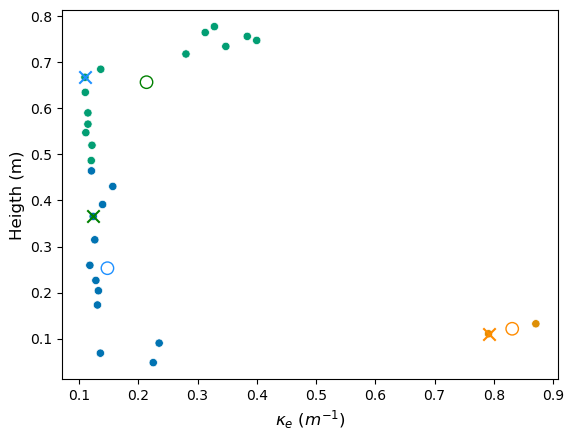

In [21]:
sns.scatterplot(x= df_c['ke'], y=df_c.height, hue = df_c.Group, legend=False, palette= 'colorblind')

plt.scatter(initial_cluster[0,0], initial_cluster[0,1], marker='x', color ='green', s = 80)
plt.scatter(initial_cluster[1,0], initial_cluster[1,1], marker='x', color ='darkorange', s = 80)
plt.scatter(initial_cluster[2,0], initial_cluster[2,1], marker='x', color ='dodgerblue', s = 80)

plt.scatter(x = kmeans.cluster_centers_[0,0], y = kmeans.cluster_centers_[0,1], facecolors='none', edgecolors='dodgerblue', s = 80)
plt.scatter(x = kmeans.cluster_centers_[1,0], y = kmeans.cluster_centers_[1,1], facecolors='none', edgecolors='darkorange', s = 80)
plt.scatter(x = kmeans.cluster_centers_[2,0], y = kmeans.cluster_centers_[2,1], facecolors='none', edgecolors='green', s = 80)
plt.xlabel('$\kappa_e$ ($m^{-1}$)', size = 12)
plt.ylabel('Heigth (m)', size = 12)
